In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats
import os
from numpy import nan

%matplotlib inline

In [2]:
path = '/Users/maria/OneDrive/Documentos/mlm/proyectoairbnb_train.csv'

# DATA ANALYSIS

In [3]:
#the dataset was uploaded removing the first column of ID that was unnecesary for the analysis
def load_data(filename):
    '''''subir datos '''''
    df = pd.read_csv(path)
    df.drop(df.columns[0], axis=1, inplace=True)
    
    return df

df = load_data(path)
df.head(3)

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0


In [4]:
#The general size
df.shape

(74111, 28)

In [5]:
#General behaviour of the dataset
df.describe()

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


### Correlation and Distribution
It was analyzed the correlation between the numeric variables and the distribution of the data

In [6]:
#correlation between variables
df.corr()

,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
log_price,1.000000,0.567574,0.355420,0.111191,-0.002193,-0.047529,-0.032470,0.091219,0.473212,0.442153
accommodates,0.567574,1.000000,0.505632,0.182306,-0.078309,-0.085160,0.041964,-0.017128,0.709258,0.810801
bathrooms,0.355420,0.505632,1.000000,0.053784,-0.137959,-0.135026,-0.041381,0.010537,0.589935,0.525591
cleaning_fee,0.111191,0.182306,0.053784,1.000000,-0.060913,-0.068505,0.110204,0.034879,0.105454,0.131632
latitude,-0.002193,-0.078309,-0.137959,-0.060913,1.000000,0.896065,-0.017642,-0.032858,-0.059162,-0.080294
longitude,-0.047529,-0.085160,-0.135026,-0.068505,0.896065,1.000000,-0.050009,-0.048801,-0.076113,-0.082150
number_of_reviews,-0.032470,0.041964,-0.041381,0.110204,-0.017642,-0.050009,1.000000,0.011708,-0.035149,0.031109
review_scores_rating,0.091219,-0.017128,0.010537,0.034879,-0.032858,-0.048801,0.011708,1.000000,0.011143,-0.027330
bedrooms,0.473212,0.709258,0.589935,0.105454,-0.059162,-0.076113,-0.035149,0.011143,1.000000,0.709416
beds,0.442153,0.810801,0.525591,0.131632,-0.080294,-0.082150,0.031109,-0.027330,0.709416,1.000000


array([[<AxesSubplot:title={'center':'log_price'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>]], dtype=object)

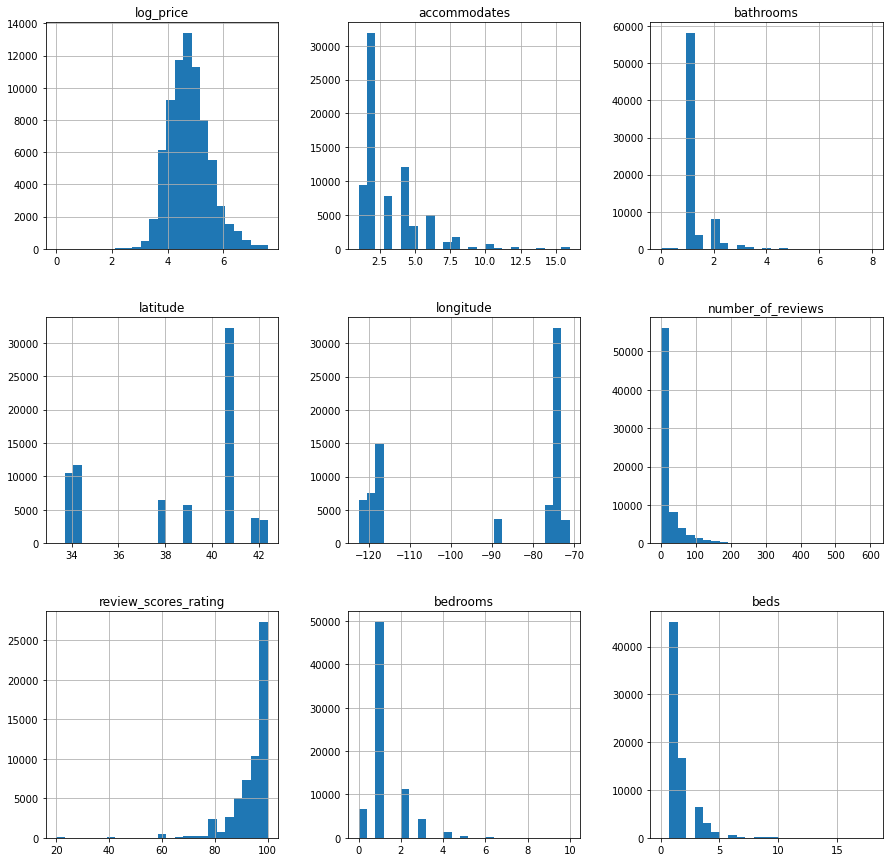

In [7]:
#Data behaviour for each variable
df.hist(figsize=(15,15),bins=25)

c:\users\maria\desktop\mlm_2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


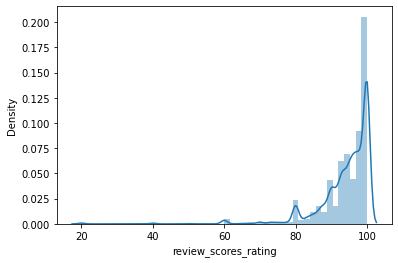

In [8]:
#Objective variable (review_scores_rating) distribution evaluation
normalidad = sns.distplot(df['review_scores_rating'])

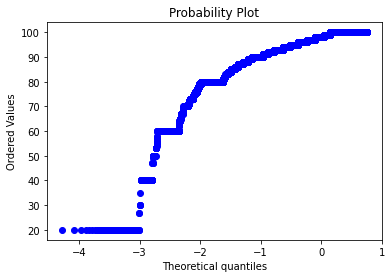

In [9]:
#Probability plot for review_scores_rating
_ = stats.probplot(df['review_scores_rating'], plot=sns.mpl.pyplot)

## MISSING DATA
There were lots of nas, therefore it was evaluated that an imputation would affect the outcome mainly for review_scores_rating so the risks of using deletion were taken. The other variables used imputation

In [10]:
#na evaluation for each variable
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [11]:
#types of data of each variable
df.dtypes

log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [12]:
#Evaluation of missing values for review_scores_rating that ended in deciding to use deletion
print(df['review_scores_rating'].median())
df['review_scores_rating'].loc[df['review_scores_rating'] == 96.0].count()

96.0


4081

In [13]:
#Deletion of nas for review_scores_rating
df2 = df.copy() 

df2.dropna(subset=['review_scores_rating'],inplace=True)
df2.shape

(57389, 28)

In [14]:
#separation of numeric variables to imputate missing values
missing = df2.select_dtypes(exclude=['object'])
missing.shape

(57389, 10)

In [15]:
#imputation process for missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(missing)

P = imputer.transform(missing)

df2 = pd.DataFrame(P, columns=missing.columns,index=missing.index)
df2.isna().sum()

log_price               0
accommodates            0
bathrooms               0
cleaning_fee            0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

## CATEGORIES
Categories were stablished based on quantiles, to make sure every category had the same size to be categorized later on. It was fixed on 3 categories because of the concentration of data in the score of 100

In [16]:
#Total of instances with each number to develop main categories
df2['review_scores_rating'].value_counts()

100.0    16215
98.0      4374
97.0      4087
96.0      4081
95.0      3713
93.0      3647
90.0      2852
99.0      2631
94.0      2618
80.0      2163
92.0      2064
91.0      1615
89.0      1120
87.0      1119
88.0      1056
85.0       625
86.0       512
60.0       444
84.0       438
83.0       403
82.0       211
70.0       196
73.0       157
81.0       126
75.0       101
20.0        97
78.0        94
40.0        90
79.0        83
76.0        76
77.0        74
67.0        66
74.0        39
72.0        38
50.0        30
65.0        28
68.0        20
71.0        14
69.0        13
63.0        11
53.0        10
64.0        10
47.0         5
30.0         4
57.0         3
55.0         3
66.0         3
62.0         3
27.0         2
35.0         1
54.0         1
49.0         1
56.0         1
58.0         1
Name: review_scores_rating, dtype: int64

In [17]:
#split of categories
quantile_list = [0, .33, .66, 1.]
categorias = df2['review_scores_rating'].quantile(quantile_list)
categorias

0.00     20.0
0.33     93.0
0.66     98.0
1.00    100.0
Name: review_scores_rating, dtype: float64

Text(0, 0.5, 'Freq')

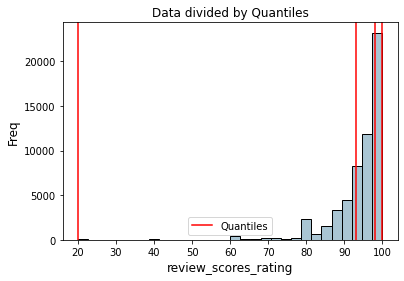

In [18]:
#diagram of distribution, scores and the location of the cateegories divisions
fig, ax = plt.subplots()
df2['review_scores_rating'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in categorias:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Data divided by Quantiles', 
             fontsize=12)
ax.set_xlabel('review_scores_rating', fontsize=12)
ax.set_ylabel('Freq', fontsize=12)

In [19]:
# new variable range created
quantile_labels = [0, 1, 2]
df2['range'] = pd.qcut(df2['review_scores_rating'], q=3, labels=False)
df2['range'] = pd.qcut(df2['review_scores_rating'], q=3, labels=quantile_labels)

df3 = df2.copy() 
df2.iloc[4:10]

,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,range
5,4.442651,2.0,1.0,1.0,37.753164,-122.429526,3.0,100.0,1.0,1.0,2
6,4.418841,3.0,1.0,1.0,33.980454,-118.462821,15.0,97.0,1.0,1.0,1
7,4.787492,2.0,1.0,1.0,34.046737,-118.260439,9.0,93.0,1.0,1.0,0
8,4.787492,2.0,1.0,1.0,37.781128,-122.501095,159.0,99.0,1.0,1.0,2
9,3.583519,2.0,1.0,1.0,33.992563,-117.895997,2.0,90.0,1.0,1.0,0
10,4.605170,2.0,1.0,1.0,40.723883,-73.983880,82.0,93.0,1.0,1.0,0


# CLASSIFICATION ANALYSIS

In [20]:
df2.select_dtypes(include='number').columns

Index(['log_price', 'accommodates', 'bathrooms', 'cleaning_fee', 'latitude',
       'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms',
       'beds'],
      dtype='object')

In [21]:
#Separation of main variables for classification
X = df2.drop(['range'], axis=1)
y = df2[['range']]

In [22]:
# y formating for classification
y = y.astype(np.uint8)

In [23]:
#Data split for algorithms
X_train, X_test, y_train, y_test = X[:57389], X[57389:], y[:57389], y[57389:]

## PARAMETRIC: SGD CLASSIFIER - MULTICLASS
Aplication of parametric classifier, due to the distribution it's not the most accurate model for this dataset
##### This is not the best model for this dataset as the distribution is not normal, a non parametric is recommended

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=24)
sgd_clf.fit(X_train, y_train.values.ravel())

SGDClassifier(random_state=24)

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train.values.ravel(), cv=10, scoring="accuracy")

array([0.88046698, 0.73444851, 0.83446593, 0.81738979, 0.83777662,
       0.88795957, 0.76598711, 0.69175815, 0.80310159, 0.91774137])

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train.values.ravel(), cv=10)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[18828,   842,     0],
       [ 3117, 11463,  4293],
       [    0,  2244, 16602]], dtype=int64)

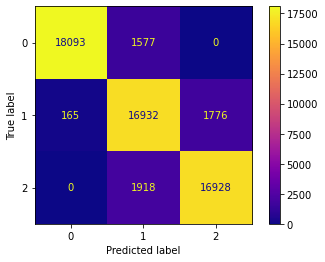

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sgd_clf, X_train, y_train, cmap='plasma')
plt.show()

## NON-PARAMETRIC: KNN MULTILABEL CLASSIFICATION
The best model for this type of data where non parametric models

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train.values.ravel(), cv=10, scoring="accuracy")

array([0.96167247, 0.96839223, 0.96489918, 0.95817774, 0.96390341,
       0.9596714 , 0.96016928, 0.96240976, 0.96066716, 0.96440129])

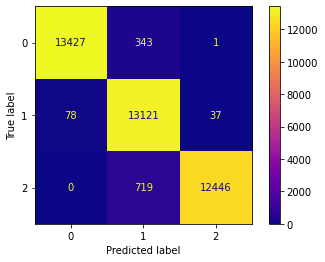

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_train, y_train, cmap='plasma')
plt.show()

In [33]:
#Statistics for model validation
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.992     0.965     0.978      5899
           1      0.907     0.988     0.945      5637
           2      0.996     0.936     0.965      5681

    accuracy                          0.963     17217
   macro avg      0.965     0.963     0.963     17217
weighted avg      0.965     0.963     0.963     17217



## NON-PARAMETRIC: RANDOM FOREST CLASSIFICATION

In [34]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=25)
forest_clf.fit(X_train, y_train.values.ravel())
y_pred = forest_clf.predict(X_test)


In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train, y_train.values.ravel(), cv=10, scoring="accuracy")

array([0.89924506, 0.90505226, 0.90737515, 0.88585536, 0.89689225,
       0.90880046, 0.89079291, 0.89573047, 0.88556491, 0.89427825])

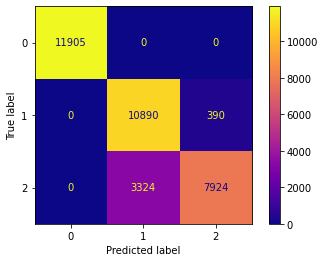

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(forest_clf, X_train, y_train, cmap='plasma')
plt.show()

In [37]:
#Statistics for model validation
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      7765
           1      0.764     0.965     0.853      7593
           2      0.953     0.701     0.808      7598

    accuracy                          0.890     22956
   macro avg      0.905     0.889     0.887     22956
weighted avg      0.906     0.890     0.888     22956



In [38]:
#Variable importance in model
feature_imp = pd.Series(forest_clf.feature_importances_).sort_values(ascending=False)
feature_imp

7    0.634583
6    0.259093
5    0.030439
0    0.022275
4    0.018224
1    0.014647
3    0.012903
9    0.007771
2    0.000066
8    0.000000
dtype: float64

Given the results and numbers of variables, the most reliable ones are number of reviews (0.635) and bedrooms (0.259).

# STATISTICAL TESTS
The dataset was analized based on the normality

### Histogram

c:\users\maria\desktop\mlm_2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


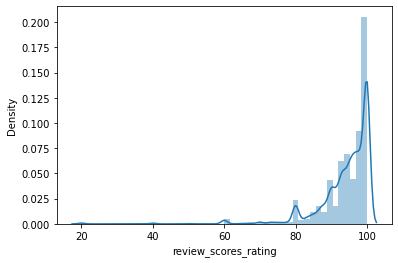

In [39]:
normalidad = sns.distplot(df2['review_scores_rating'])

### Q-Q Plot

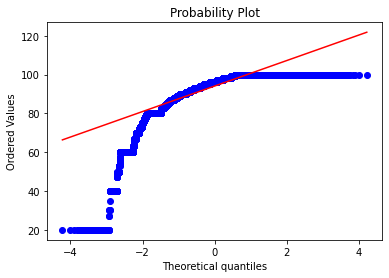

In [40]:
_ = stats.probplot(df2['review_scores_rating'], plot=sns.mpl.pyplot)

### Shapiro-Wilk test

In [41]:
from scipy.stats import shapiro

stat, p = shapiro(df2['review_scores_rating'])
print('Statistics=%.3f, p=%.5f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Seems to be normal')
else:
    print('Does not seem to be normal')

Statistics=0.701, p=0.00000
Does not seem to be normal


c:\users\maria\desktop\mlm_2021\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### D'Agostino's K^2 test

In [42]:
from scipy.stats import normaltest

stat, p = normaltest(df2['review_scores_rating'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Seems to be normal')
else:
    print('Does not seem to be normal')

Statistics=42838.357, p=0.000
Does not seem to be normal


### Anderson-Darling test

In [43]:
from scipy.stats import anderson

result = anderson(df2['review_scores_rating'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, Seems to be normal' % (sl, cv))
    else:
        print('Alpha = %.3f: %.3f, Does not seem to be normal' % (sl, cv))

Statistic: 3633.380
Alpha = 15.000: 0.576, Does not seem to be normal
Alpha = 10.000: 0.656, Does not seem to be normal
Alpha = 5.000: 0.787, Does not seem to be normal
Alpha = 2.500: 0.918, Does not seem to be normal
Alpha = 1.000: 1.092, Does not seem to be normal


## EXPLORATORY VISUALIZATIONS
Data behavior for variable understanding

### Correlation

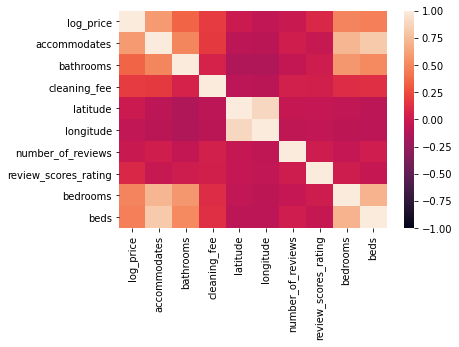

In [44]:
# mapa de correlacion entre las variables numericas
ax = sns.heatmap(df2.corr(),vmin=-1,vmax=1)

### Boxplot

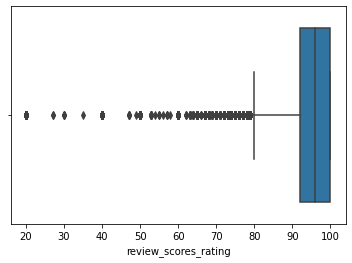

In [45]:
ax = sns.boxplot(x=df2["review_scores_rating"])

### Factorplot

c:\users\maria\desktop\mlm_2021\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


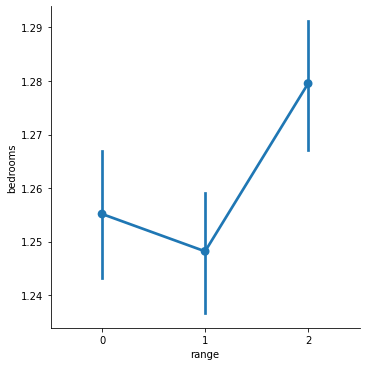

In [46]:
sns.factorplot(x ='range', y = 'bedrooms', data = df3) 

c:\users\maria\desktop\mlm_2021\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


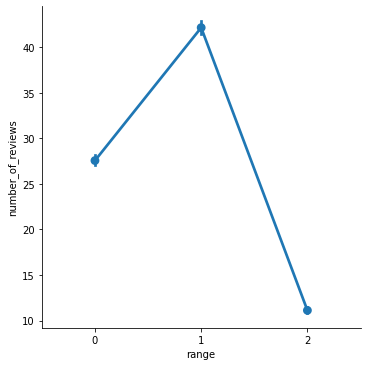

In [47]:
sns.factorplot(x ='range', y = 'number_of_reviews', data = df3) 